In [7]:
import nltk
import json

splits = ['Training', 'Validation']

new_json_lines = []
total = 0
skipped = 0
for split in splits:
    with open(f'../../TaskA-{split}Set.json', 'r') as file:
        json_obj = json.load(file)
        ids = list(json_obj['ID'].values())
        for example_id in ids:
            new_json_obj = {'id': example_id, 'header': json_obj['section_header'][str(example_id)],
                            'summary': nltk.sent_tokenize(json_obj['section_text'][str(example_id)]),
                            'dialogue': [string.replace('\r', '') for string in
                                         json_obj['dialogue'][str(example_id)].split('\n')]}
            # Remove those w/ < 3 tokens
            if len(json_obj['section_text'][str(example_id)].split(' ')) < 3:
                skipped += 1
                continue
            total += 1
            new_json_lines.append(json.dumps(new_json_obj))

print(f'Skipped {skipped} out of {total}')

Skipped 174 out of 1077


In [9]:
validation_size = len(new_json_lines) // 10
validation_size

107

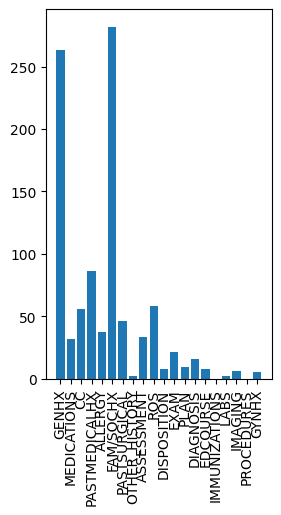

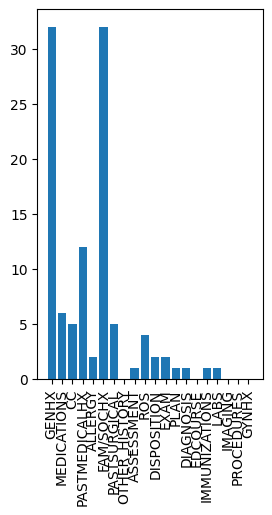

In [56]:
import random

validation_indices = set(random.sample(range(len(new_json_lines)), validation_size))

training_set_lines = []
validation_set_lines = []

header_count_training = {}
header_count_validation = {}

CATEGORIES = ['GENHX', 'MEDICATIONS', 'CC', 'PASTMEDICALHX', 'ALLERGY', 'FAM/SOCHX',
 'PASTSURGICAL', 'OTHER_HISTORY', 'ASSESSMENT', 'ROS', 'DISPOSITION', 'EXAM',
 'PLAN', 'DIAGNOSIS', 'EDCOURSE', 'IMMUNIZATIONS', 'LABS', 'IMAGING',
 'PROCEDURES', 'GYNHX']
for category in CATEGORIES:
    header_count_training[category] = 0
    header_count_validation[category] = 0

for i in range(len(new_json_lines)):
    line = new_json_lines[i]
    json_obj = json.loads(line)
    header = json_obj['header']
    if i in validation_indices:
        validation_set_lines.append(line)
        header_count_validation[header] += 1
    else:
        training_set_lines.append(line)
        header_count_training[header] += 1

with open('New-TaskA-TrainingData.jsonl', 'w') as file:
    file.write('\n'.join(training_set_lines))

with open('New-TaskA-ValidationData.jsonl', 'w') as file:
    file.write('\n'.join(validation_set_lines))

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.bar(range(len(header_count_training)), list(header_count_training.values()), align='center')
plt.xticks(range(len(header_count_training)), list(header_count_training.keys()), rotation='vertical')
plt.show()
plt.subplot(1, 2, 2)
plt.bar(range(len(header_count_validation)), list(header_count_validation.values()), align='center')
plt.xticks(range(len(header_count_validation)), list(header_count_validation.keys()), rotation='vertical')
plt.show()